<a href="https://colab.research.google.com/github/tlsrhksdn/2024_2-ADAM/blob/project/%EA%B8%80%EB%A1%9C%EB%B2%8C%EA%B2%BD%EC%A0%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib

In [ ]:
import koreanize_matplotlib
from google.colab import files

# 1. kaggle.json 파일을 Colab에 업로드
files.upload()  # kaggle.json 파일을 업로드

# 2. Kaggle API 설정 파일을 올바른 위치로 이동
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# 데이터셋 다운로드 명령어
!kaggle datasets download -d prasad22/global-economy-indicators

Dataset URL: https://www.kaggle.com/datasets/prasad22/global-economy-indicators
License(s): CC0-1.0
global-economy-indicators.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip global-economy-indicators.zip -d ./dataset

Archive:  global-economy-indicators.zip
replace ./dataset/Global Economy Indicators.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   AMA exchange rate                                                                         10512 non-null  float64
 4   IMF based exchange rate                                                                   10512 non-null  float64
 5   Population                                           

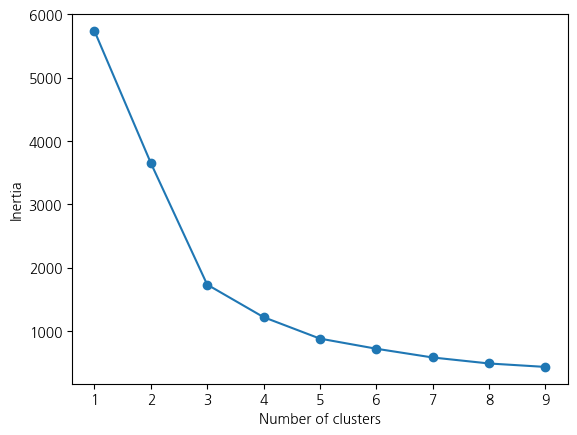

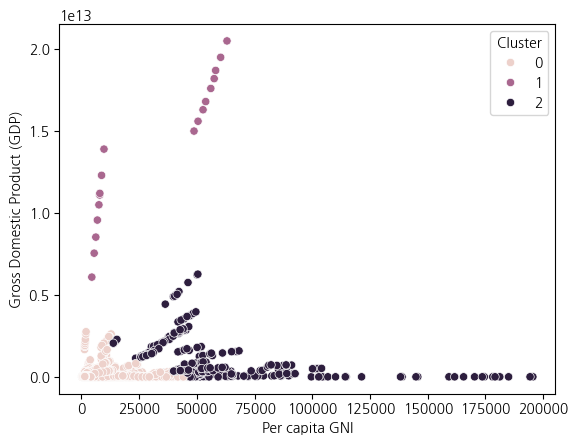

Cluster 0:
[' Afghanistan ' ' Albania ' ' Algeria ' ' Andorra ' ' Angola '
 ' Antigua and Barbuda ' ' Azerbaijan ' ' Argentina ' ' Bahamas '
 ' Bahrain ' ' Bangladesh ' ' Armenia ' ' Barbados ' ' Bhutan '
 ' Bolivia (Plurinational State of) ' ' Bosnia and Herzegovina '
 ' Botswana ' ' Brazil ' ' Belize ' ' Solomon Islands '
 ' British Virgin Islands ' ' Brunei Darussalam ' ' Bulgaria ' ' Myanmar '
 ' Burundi ' ' Belarus ' ' Cambodia ' ' Cameroon ' ' Cabo Verde '
 ' Cayman Islands ' ' Central African Republic ' ' Sri Lanka ' ' Chad '
 ' Chile ' ' Colombia ' ' Comoros ' ' Congo ' ' D.R. of the Congo '
 ' Cook Islands ' ' Costa Rica ' ' Croatia ' ' Cuba ' ' Cyprus '
 ' Czechia ' ' Benin ' ' Dominica ' ' Dominican Republic ' ' Ecuador '
 ' El Salvador ' ' Equatorial Guinea ' ' Ethiopia ' ' Eritrea '
 ' Estonia ' ' Fiji ' ' French Polynesia ' ' Djibouti ' ' Gabon '
 ' Georgia ' ' Gambia ' ' State of Palestine ' ' Ghana ' ' Kiribati '
 ' Greece ' ' Greenland ' ' Grenada ' ' Guatemala ' ' Gui

In [ ]:
#1. 라이브러리 및 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#2. 데이터 탐색 및 이해
df = pd.read_csv('./dataset/Global Economy Indicators.csv')

# 컬럼명의 불필요한 공백을 정리합니다.
df.columns = df.columns.str.strip()

df.head()  # 데이터 확인
# 데이터의 전체적인 정보 확인
df.info()
#수치형 데이터의 통계량 확인
df.describe()

# 데이터셋의 고유한 국가와 연도의 수 확인
print(df['Country'].unique())
print(df['Year'].unique())

#3. 결측값 및 이상치 처리
# 각 열에 존재하는 결측값의 수 확인
df.isnull().sum()

# 분석에 필요한 주요 경제 지표 선택
selected_columns = ['Country', 'Year', 'Gross Domestic Product (GDP)', 'Population', 'Per capita GNI', 'Exports of goods and services']
data = df[selected_columns]
data

# 결측값 확인 및 처리
data = data.dropna()

# 특정 연도 혹은 기간을 선택해 데이터의 일관성 유지
data = data[(data['Year'] >= 2010) & (data['Year'] <= 2018)]
data

# 데이터 시각화

# # 주요 경제 지표들의 분포를 히스토그램으로 나타내기
# sns.histplot(data['Gross Domestic Product (GDP)'], kde=True)
# plt.title('Gross Domestic Product (GDP) Distribution')
# plt.show()

# # GDP와 1인당 GNI의 관계를 산점도로 시각화하기
# sns.scatterplot(x='Per capita GNI', y='Gross Domestic Product (GDP)', data=data)
# plt.title('Gross Domestic Product (GDP) vs. Per capita GNI')
# plt.show()

# # 국가별 GDP를 막대그래프로 나타내기
# top_countries = data.groupby('Country')['Gross Domestic Product (GDP)'].mean().nlargest(10)
# top_countries.plot(kind='bar')
# plt.show()

# # 상관관계 행렬을 시각화하여 지표들 간의 상관관계 확인하기
# corr_matrix = data.drop("Country", axis=1).corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

# 4. 군집화 분석

# scikit-learn 라이브러리를 사용해 군집화 분석 수행
from sklearn.preprocessing import StandardScaler
features = ['Gross Domestic Product (GDP)', 'Per capita GNI', 'Exports of goods and services']
x = data[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# K-Means 알고리즘을 사용하여 국가들을 군집화
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 군집화 결과를 시각화하여 각 군집의 특성 파악

# 2차원 또는 3차원 플롯 사용
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(x_scaled)
sns.scatterplot(x='Per capita GNI', y='Gross Domestic Product (GDP)', hue='Cluster', data=data)
plt.show()

# 각 군집에 속한 국가들을 확인하고 군집의 특징 해석
for cluster in data['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster]['Country'].unique())

# 5. 결정 트리 회귀

# 특정 경제 지표를 다른 지표들을 기반으로 예측하기 위해 결정 트리 회귀를 수행
# 이를 통해 고객사는 미래의 경제 지표를 예측하고 전략을 수립할 수 있다.

# 예측하고자 하는 목표 변수 선택
y = data['Gross Domestic Product (GDP)']

# 설명 변수(features)로 사용할 지표 선택
features = ['Population', 'Per capita GNI', 'Exports of goods and services']
x = data[features]

# 데이터를 학습용과 테스트용으로 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 결정 트리 회귀 모델 학습
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

# 테스트 데이터를 사용해 모델의 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


#회귀 결과 해석 및 어떤 지표가 목표 변수에 큰 영향을 미치는지 분석
feature_importances = regressor.feature_importances_
for name, importance in zip(features, feature_importances):
    print(f"{name}: {importance}")

# 6. 결론 도출 및 보고서 작성

# 군집별로 평균 지표 값을 계산하고 비교
cluster_summary = data.drop(["Country", "Year"], axis=1).groupby('Cluster').mean()
print(cluster_summary)
